In [1]:
# Alex W
# 1003474

# 3a
# theta = def ridge_regression(X, Y, l):...

# 3b
# regularisation = 0.012589254117941352

#%%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv("HW1_data/3/hw1_ridge_x.dat", header=None, dtype=np.float64)
Y = pd.read_csv("HW1_data/3/hw1_ridge_y.dat", header=None, dtype=np.float64)


In [3]:
val_X = X.head(10)
train_X = X.tail(40)
val_Y = Y.head(10)
train_Y = Y.tail(40)


In [4]:


def ridge_regression(X, Y, l):
    n = X.shape[0]  # samples
    m = X.shape[1]  # features

    A = l * np.eye(m) + 1 / n * X.T @ X
    b = 1 / n * X.T @ Y

    # theta = np.mat(A).I @ b
    theta = np.linalg.pinv(A) @ b

    return theta.T[0]


regularisation = .15
theta = ridge_regression(train_X.values, train_Y.values, regularisation)
print(theta)


[-0.57939825  1.15033028  0.04934122 -1.59867896]


In [5]:
# reassign
vX = val_X.values
tX = train_X.values
vY = val_Y.values
tY = train_Y.values


def calculate_least_squared_error(X, Y, theta):
    X = np.mat(X)
    Y = np.mat(Y)
    theta = np.mat(theta).T
    predicted_y = X @ theta
    error = predicted_y - Y
    squared_error = np.power(error, 2)
    sum_squared_error = np.sum(squared_error)
    squared_error = sum_squared_error / (2 * X.shape[0])

    return squared_error



best regularisation: 0.012589254117941352


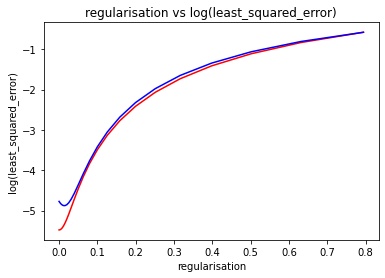

In [6]:
import matplotlib.pyplot as plt
train_error = []
val_error = []

regularisation_list = [10**i for i in np.arange(-5, 0, 0.1)]

for regularisation in regularisation_list:
    theta = ridge_regression(train_X.values, train_Y.values, regularisation)
    train_error.append(
        calculate_least_squared_error(train_X.values, train_Y.values, theta))
    val_error.append(
        calculate_least_squared_error(val_X.values, val_Y.values, theta))

plt.plot(regularisation_list, np.log(train_error), 'r')
plt.plot(regularisation_list, np.log(val_error), 'b')
plt.xlabel('regularisation')
plt.ylabel('log(least_squared_error)')
plt.title(f'regularisation vs log(least_squared_error)')

print(f'best regularisation: {regularisation_list[np.argmin(val_error)]}')